This is not my own work, please see this webpage

[Refrence Article](https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from joblib import dump, load

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [5]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Project 

In [6]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv', 
    sep = ','
)
df = df.rename(columns = {'fecha':'date'}) # not everyone speaks spanish, pero yo si!
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")
df = df.sort_index()
df = df.asfreq('MS')
df = df[['y']] # just want the y value for now
df

,y
date,
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887


In [7]:
missing_data_row_count = df.isnull().any(axis = 1).sum()

if missing_data_row_count > 0:
    print(f'the data is missing in {missing_data_row_count} rows :(')
else: print('there is NO missing data :)')

there is NO missing data :)


In [8]:
expected_index = pd.date_range(
    start = df.index.min(), 
    end = df.index.max(), 
    freq = df.index.freq
)
#
if (expected_index != df.index).sum() > 0:
    print(f'the data is missing {(expected_index != df.index).sum()} indexes :(')
else: print('there is NO missing indexes :)')

there is NO missing indexes :)


## Split data into a training and a testing set

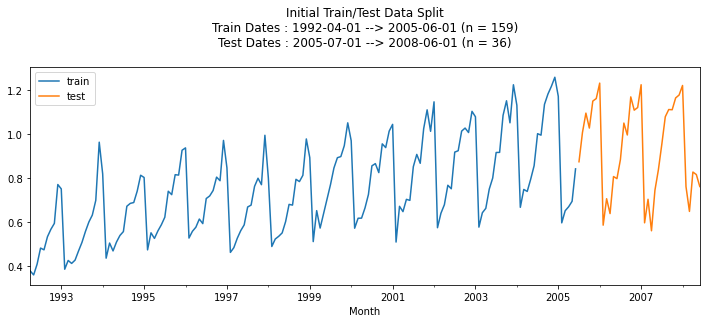

In [9]:
months_for_training = 36
df_train = df[:-months_for_training]
df_test  = df[-months_for_training:]
#
fig, ax = plt.subplots(figsize = (12, 4))
df_train['y'].plot(ax = ax, label = 'train')
df_test['y'].plot(ax = ax, label = 'test')
ax.set_title(f'''Initial Train/Test Data Split
Train Dates : {df_train.index.min().date()} --> {df_train.index.max().date()} (n = {len(df_train)})
Test Dates : {df_test.index.min().date()} --> {df_test.index.max().date()} (n = {len(df_test)})
''')
ax.set_xlabel('Month')
ax.legend()

# ForecasterAutoreg

In [20]:
window_size = 20

def custom_predictors(y):
    '''
    Create first 10 lags of a time series.
    Calculate moving average with window 20.
    '''
    lags = y[-1:-11:-1]
    mean = np.mean(y[-window_size:])
    predictors = np.hstack([lags, mean])
    
    return predictors

# create the forecasting model
forecaster = ForecasterAutoregCustom(
    regressor = RandomForestRegressor(random_state = 420),
    fun_predictors = custom_predictors,
    window_size = window_size
)
# fit to the data
forecaster.fit(y = df_train['y'])
#
forecaster

CustomFunction
def custom_predictors(y):
    '''
    Create first 10 lags of a time series.
    Calculate moving average with window 20.
    '''
    lags = y[-1:-11:-1]
    mean = np.mean(y[-window_size:])
    predictors = np.hstack([lags, mean])
    
    return predictors



ForecasterAutoregCustom 
Regressor: RandomForestRegressor(random_state=420) 
Predictors created with function: custom_predictors 
Window size: 20 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 420, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-04-17 18:50:11 
Last fit date: 2022-04-17 18:50:11 
Skforecast version: 0.4.3 

In [23]:
print('='*len('CustomFunction'))
print('CustomFunction')
print('='*len('CustomFunction'))
print(forecaster.source_code_create_predictors)
X, y = forecaster.create_train_X_y(y=df_train['y'])
print('='*len('InternalMatrices_X'))
print('InternalMatrices_X')
print('='*len('InternalMatrices_X'))
print(X.head())
print('='*len('InternalMatrices_y'))
print('InternalMatrices_y')
print('='*len('InternalMatrices_y'))
print(y.head())

CustomFunction
def custom_predictors(y):
    '''
    Create first 10 lags of a time series.
    Calculate moving average with window 20.
    '''
    lags = y[-1:-11:-1]
    mean = np.mean(y[-window_size:])
    predictors = np.hstack([lags, mean])
    
    return predictors

InternalMatrices_X
            custom_predictor_0  custom_predictor_1  custom_predictor_2  \
date                                                                     
1993-12-01            0.699605            0.632947            0.601514   
1994-01-01            0.963081            0.699605            0.632947   
1994-02-01            0.819325            0.963081            0.699605   
1994-03-01            0.437670            0.819325            0.963081   
1994-04-01            0.506121            0.437670            0.819325   

            custom_predictor_3  custom_predictor_4  custom_predictor_5  \
date                                                                     
1993-12-01            0.558443         

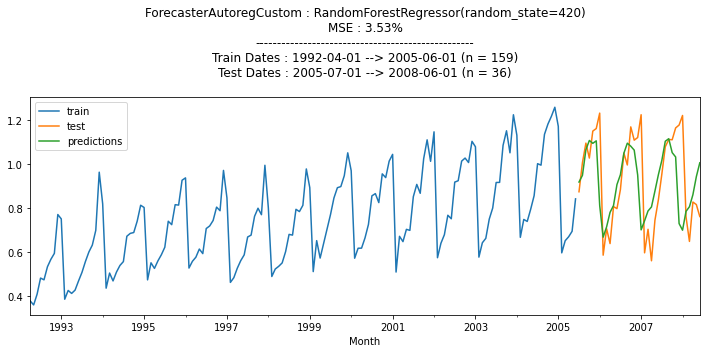

In [25]:
predictions = forecaster.predict(steps = months_for_training)
error_mse = mean_squared_error(
    y_true = df_test['y'],
    y_pred = predictions
)
#
fig, ax = plt.subplots(figsize = (12, 4))
df_train['y'].plot(ax = ax, label = 'train')
df_test['y'].plot(ax = ax, label = 'test')
predictions.plot(ax = ax, label = 'predictions')
ax.set_title(f'''ForecasterAutoregCustom : {forecaster.regressor}
MSE : {error_mse:.2%}
{'-'*50}
Train Dates : {df_train.index.min().date()} --> {df_train.index.max().date()} (n = {len(df_train)})
Test Dates : {df_test.index.min().date()} --> {df_test.index.max().date()} (n = {len(df_test)})
''')
ax.set_xlabel('Month')
ax.legend()

In [28]:
results_grid = grid_search_forecaster(
    param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [3, 5, 10]
    },
    forecaster = ForecasterAutoregCustom(
        regressor = RandomForestRegressor(random_state = 420),
        fun_predictors = custom_predictors,
        window_size = window_size
    ),
    y = df_train['y'],
    lags_grid = [10, 20],
    steps = months_for_training,
    refit = True,
    metric = 'mean_squared_error',
    initial_train_size  = int(len(df_train)*0.5),
    fixed_train_size = False,
    return_best = True,
    verbose = False
)
#
results_grid

Number of models compared: 6


loop lags_grid: 100%|███████████████████████████████████████| 1/1 [00:11<00:00, 11.95s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: custom predictors 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 0.03410714242824896



,lags,params,metric,max_depth,n_estimators
4,custom predictors,"{'max_depth': 10, 'n_estimators': 100}",0.034107,10,100
2,custom predictors,"{'max_depth': 5, 'n_estimators': 100}",0.034116,5,100
0,custom predictors,"{'max_depth': 3, 'n_estimators': 100}",0.034136,3,100
3,custom predictors,"{'max_depth': 5, 'n_estimators': 500}",0.035214,5,500
1,custom predictors,"{'max_depth': 3, 'n_estimators': 500}",0.036263,3,500
5,custom predictors,"{'max_depth': 10, 'n_estimators': 500}",0.037178,10,500


In [33]:
# create the forecasting model
forecaster = ForecasterAutoregCustom(
    regressor = RandomForestRegressor(
        **results_grid.iloc[0]['params'],
        random_state = 420,
    ),
    fun_predictors = custom_predictors,
    window_size = window_size
)
# fit to the data
forecaster.fit(y = df_train['y'])
#
forecaster

ForecasterAutoregCustom 
Regressor: RandomForestRegressor(max_depth=10, random_state=420) 
Predictors created with function: custom_predictors 
Window size: 20 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 420, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-04-17 19:10:49 
Last fit date: 2022-04-17 19:10:49 
Skforecast version: 0.4.3 

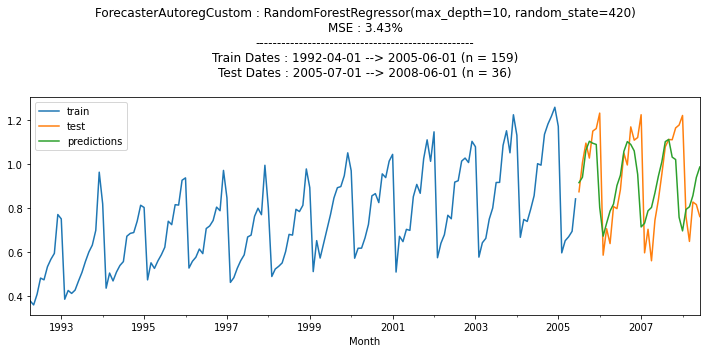

In [34]:
predictions = forecaster.predict(steps = months_for_training)
error_mse = mean_squared_error(
    y_true = df_test['y'],
    y_pred = predictions
)
#
fig, ax = plt.subplots(figsize = (12, 4))
df_train['y'].plot(ax = ax, label = 'train')
df_test['y'].plot(ax = ax, label = 'test')
predictions.plot(ax = ax, label = 'predictions')
ax.set_title(f'''ForecasterAutoregCustom : {forecaster.regressor}
MSE : {error_mse:.2%}
{'-'*50}
Train Dates : {df_train.index.min().date()} --> {df_train.index.max().date()} (n = {len(df_train)})
Test Dates : {df_test.index.min().date()} --> {df_test.index.max().date()} (n = {len(df_test)})
''')
ax.set_xlabel('Month')
ax.legend()

## Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 87
Number of observations used for backtesting: 108
    Number of folds: 3
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   1992-04-01 00:00:00 -- 1999-06-01 00:00:00
    Validation: 1999-07-01 00:00:00 -- 2002-06-01 00:00:00
Data partition in fold: 1
    Training:   1992-04-01 00:00:00 -- 2002-06-01 00:00:00
    Validation: 2002-07-01 00:00:00 -- 2005-06-01 00:00:00
Data partition in fold: 2
    Training:   1992-04-01 00:00:00 -- 2005-06-01 00:00:00
    Validation: 2005-07-01 00:00:00 -- 2008-06-01 00:00:00



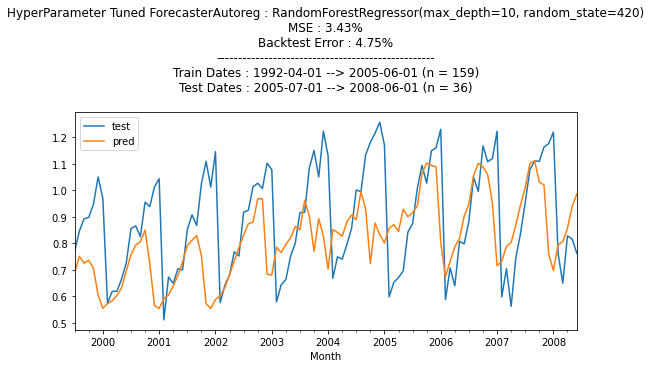

In [35]:
error_backtest, predictions_backtest = backtesting_forecaster(
    forecaster = forecaster,
    y = df['y'],
    initial_train_size = len(df) - (months_for_training * 3),
    fixed_train_size = False,
    steps = months_for_training,
    metric = 'mean_squared_error',
    refit = True,
    verbose = True
)
#
fig, ax = plt.subplots(figsize=(9, 4))
df.loc[predictions_backtest.index, 'y'].plot(ax = ax, label = 'test')
predictions_backtest.plot(ax = ax, label='predictions')
ax.set_title(f'''HyperParameter Tuned ForecasterAutoreg : {forecaster.regressor}
MSE : {error_mse:.2%}
Backtest Error : {error_backtest:.2%}
{'-'*50}
Train Dates : {df_train.index.min().date()} --> {df_train.index.max().date()} (n = {len(df_train)})
Test Dates : {df_test.index.min().date()} --> {df_test.index.max().date()} (n = {len(df_test)})
''')
ax.set_xlabel('Month')
ax.legend()

In [36]:
forecaster.get_feature_importance().style.format({'importance': '{:,.2%}'.format})

,feature,importance
0,custom_predictor_0,50.14%
1,custom_predictor_1,11.87%
2,custom_predictor_2,5.92%
3,custom_predictor_3,3.41%
4,custom_predictor_4,3.20%
5,custom_predictor_5,2.42%
6,custom_predictor_6,4.81%
7,custom_predictor_7,2.11%
8,custom_predictor_8,1.91%
9,custom_predictor_9,8.80%
